In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns=None
sns.set_style('darkgrid')

## Dataset description
###### The dataset consists of 10 numerical and 8 categorical attributes.
###### Numerical features:
- Administrative: Number of pages visited by the visitor about account management.
- Administrative Duration: Total amount of time (in seconds) spent by the visitor on account management related pages.
- Informational: Number of pages visited by the visitor about website, communication and address information of the shopping site.
- Informational Duration: Total amount of time (in seconds) spent by the visitor on informational pages.
- Product Related: Number of pages visited by visitor about product related pages.
- Product Related Duration: Total amount of time (in seconds) spent by the visitor on product related pages.
- Bounce Rate: Average bounce rate value of the pages visited by the visitor.It measures the perecentage of people who land on your website and do completely nothing on the page they entered.
- Exit Rate: Average exit rate value of the pages visited by the visitor. The number of people who exit your website after landing on a page and compares it to the total number of views the page recieved.
- Page Value: Average page value of the pages visited by the visitor. It is a value assigned to every page by Google. If the page wasnt involved in an e-commerce transaction for your website in any way, then the Page value for that page will be $0.
- Special Day: Closeness of the site visiting time to a special day.

###### Categorical features:
- Operating Systems: Operating system of the visitor.
- Browser: Browser of the visitor.
- Region: Geographic region from which the session has been started by the visitor.
- Traffic Type:Traffic source by which the visitor has arrived at the website (e.g. banner, SMS, direct).
- Visitor Type: Visitor type as “New Visitor”, “Returning Visitor” and “Other”.
- Weekend:Boolean value indicating whether the date of the visit is weekend.
- Month:Month value of the visit date.
- Revenue:Class label indicating whether the visit has been finalized with a transaction.

In [2]:
data=pd.read_csv('online_shoppers_intention.csv')
data.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [3]:
data.shape

(12330, 18)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
data.describe()

Administrative  Administrative_Duration  Informational  \
count    12330.000000             12330.000000   12330.000000   
mean         2.315166                80.818611       0.503569   
std          3.321784               176.779107       1.270156   
min          0.000000                 0.000000       0.000000   
25%          0.000000                 0.000000       0.000000   
50%          1.000000                 7.500000       0.000000   
75%          4.000000                93.256250       0.000000   
max         27.000000              3398.750000      24.000000   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
count            12330.000000    12330.000000             12330.000000   
mean                34.472398       31.731468              1194.746220   
std                140.749294       44.475503              1913.669288   
min                  0.000000        0.000000                 0.000000   
25%                  0.000000        7.000000               184.137500   
50%                  0.000000       18.000000               598.936905   
75%                  0.000000       38.000000              1464.157213   
max               2549.375000      705.000000             63973.522230   

        BounceRates     ExitRates    PageValues    SpecialDay  \
count  12330.000000  12330.000000  12330.000000  12330.000000   
mean       0.022191      0.043073      5.889258      0.061427   
std        0.048488      0.048597     18.568437      0.198917   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.014286      0.000000      0.000000   
50%        0.003112      0.025156      0.000000      0.000000   
75%        0.016813      0.050000      0.000000      0.000000   
max        0.200000      0.200000    361.763742      1.000000   

       OperatingSystems       Browser        Region   TrafficType  
count      12330.000000  12330.000000  12330.000000  12330.000000  
mean           2.124006      2.357097      3.147364      4.069586  
std            0.911325      1.717277      2.401591      4.025169  
min            1.000000      1.000000      1.000000      1.000000  
25%            2.000000      2.000000      1.000000      2.000000  
50%            2.000000      2.000000      3.000000      2.000000  
75%            3.000000      2.000000      4.000000      4.000000  
max            8.000000     13.000000      9.000000     20.000000

In [6]:
data.nunique()

Administrative               27
Administrative_Duration    3335
Informational                17
Informational_Duration     1258
ProductRelated              311
ProductRelated_Duration    9551
BounceRates                1872
ExitRates                  4777
PageValues                 2704
SpecialDay                    6
Month                        10
OperatingSystems              8
Browser                      13
Region                        9
TrafficType                  20
VisitorType                   3
Weekend                       2
Revenue                       2
dtype: int64

In [7]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [8]:
data['OperatingSystems']=data['OperatingSystems'].astype('object')
data['Browser']=data['Browser'].astype('object')
data['Region']=data['Region'].astype('object')
data['TrafficType']=data['TrafficType'].astype('object')
data['Weekend']=data['Weekend'].astype('object')
data['Revenue']=data['Revenue'].astype('object')

In [9]:
data.columns=data.columns.str.lower()

# EDA

### Anlaysing target vairable: Revenue

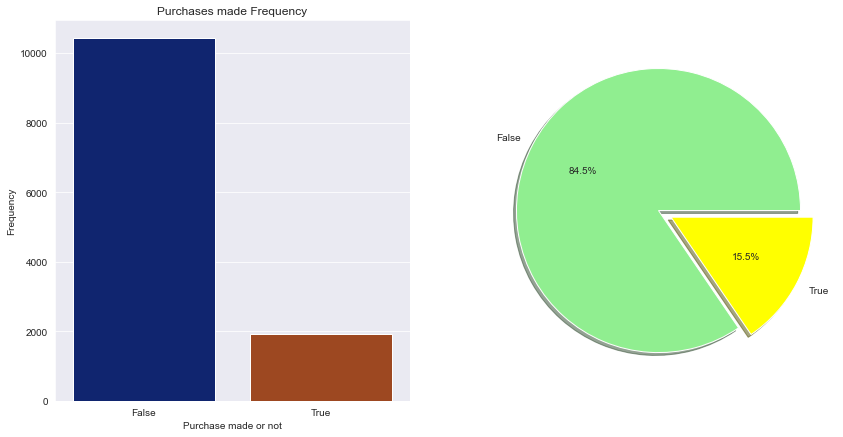

In [10]:
#Distribution of customers
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.countplot(data.revenue,palette='dark')
plt.title('Purchases made Frequency')
plt.ylabel('Frequency')
plt.xlabel('Purchase made or not')

plt.subplot(1,2,2)
a=data.revenue.value_counts()
keys=a.keys().to_list()
counts=a.to_list()
plt.pie(counts,labels=keys,autopct='%1.1f%%',shadow=True,explode=[0,0.1],colors=['lightgreen','yellow'])

plt.show()

In [11]:
data.revenue.value_counts()

False    10422
True      1908
Name: revenue, dtype: int64

- *We can see that the data is unbalanced as almost 85% of the customers have not made any purchase.*

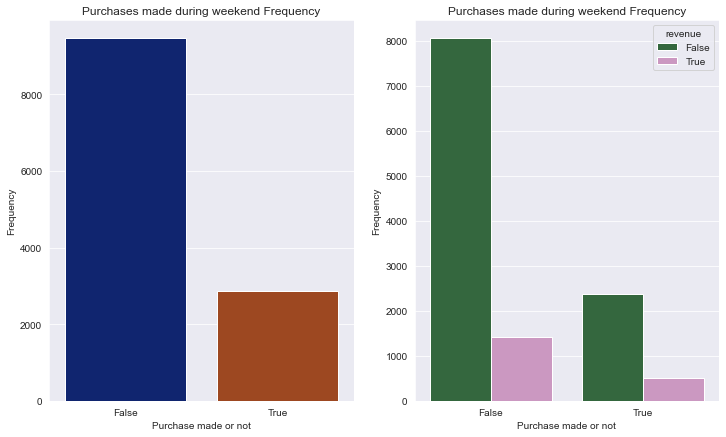

In [12]:
#Distribution of customers on weekends
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(data.weekend,palette='dark')
plt.title('Purchases made during weekend Frequency')
plt.ylabel('Frequency')
plt.xlabel('Purchase made or not')

plt.subplot(1,2,2)
sns.countplot(data.weekend,palette='cubehelix',hue=data.revenue)
plt.title('Purchases made during weekend Frequency')
plt.ylabel('Frequency')
plt.xlabel('Purchase made or not')

plt.show()

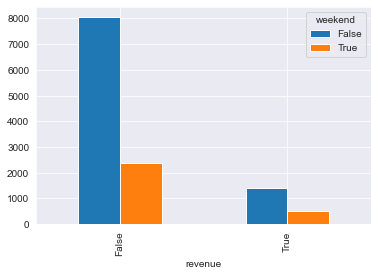

In [13]:
pd.crosstab(data.revenue,data.weekend).plot(kind='bar')
plt.show()

In [14]:
pd.crosstab(data.revenue,data.weekend,margins=True)

weekend  False  True    All
revenue                    
False     8053  2369  10422
True      1409   499   1908
All       9462  2868  12330

- *You can see that rate of sales on weekends are 17.4% compared to 14.9% sales on weekdays. So there is a slight increase in sales on weekends but it is not a significant increase.*

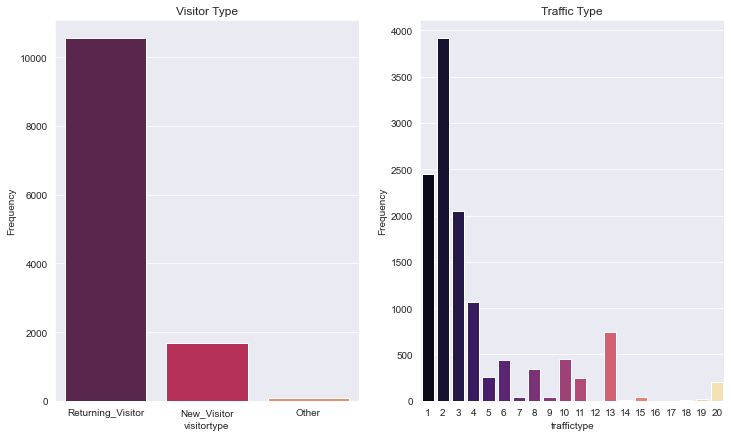

In [15]:
# Distribution of customers based on visitor type and traffic type
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(data.visitortype,palette='rocket')
plt.title('Visitor Type')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(data.traffictype,palette='magma')
plt.title('Traffic Type')
plt.ylabel('Frequency')

plt.show()

<Figure size 864x504 with 0 Axes>

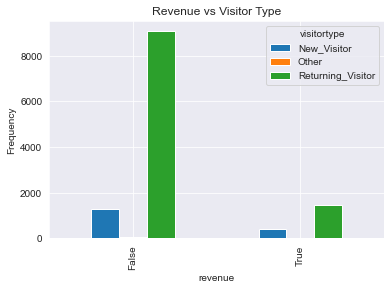

In [16]:
#Bi-variate analysis of visitor type with Revenue
plt.figure(figsize=(12,7))
pd.crosstab(data.revenue,data.visitortype).plot(kind='bar')
plt.title('Revenue vs Visitor Type')
plt.ylabel('Frequency')
plt.show()

In [17]:
pd.crosstab(data.revenue,data.visitortype)

visitortype  New_Visitor  Other  Returning_Visitor
revenue                                           
False               1272     69               9081
True                 422     16               1470

<Figure size 1440x1080 with 0 Axes>

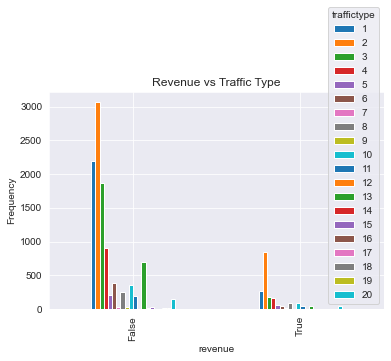

In [18]:
#Bi-variate analysis of traffic type with Revenue
plt.figure(figsize=(20,15))
pd.crosstab(data.revenue,data.traffictype).plot(kind='bar')
plt.title('Revenue vs Traffic Type')
plt.ylabel('Frequency')
plt.show()

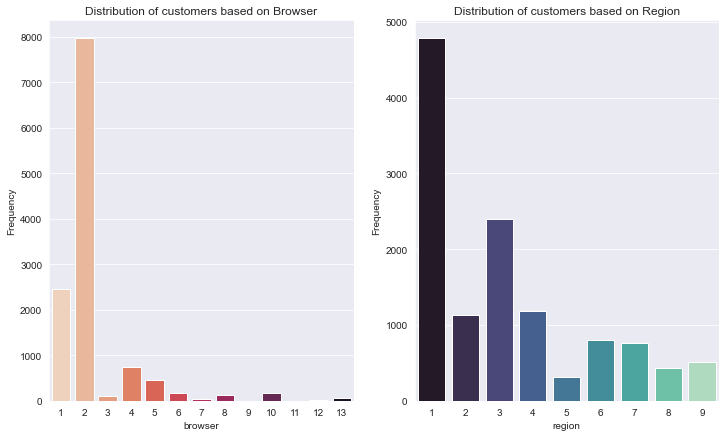

In [19]:
#Distribution of customers based on Browser and Region
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(data.browser,palette='rocket_r')
plt.title('Distribution of customers based on Browser')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(data.region,palette='mako')
plt.title('Distribution of customers based on Region')
plt.ylabel('Frequency')

plt.show()

<Figure size 1296x504 with 0 Axes>

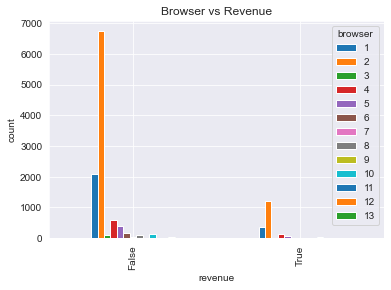

In [20]:
plt.figure(figsize=(18,7))
pd.crosstab(data.revenue,data.browser).plot(kind='bar')
plt.title('Browser vs Revenue')
plt.ylabel('count')
plt.show()

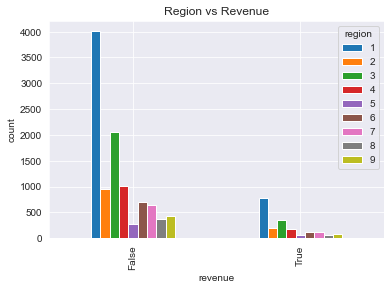

In [21]:
pd.crosstab(data.revenue,data.region).plot(kind='bar')
plt.title('Region vs Revenue')
plt.ylabel('count')
plt.show()

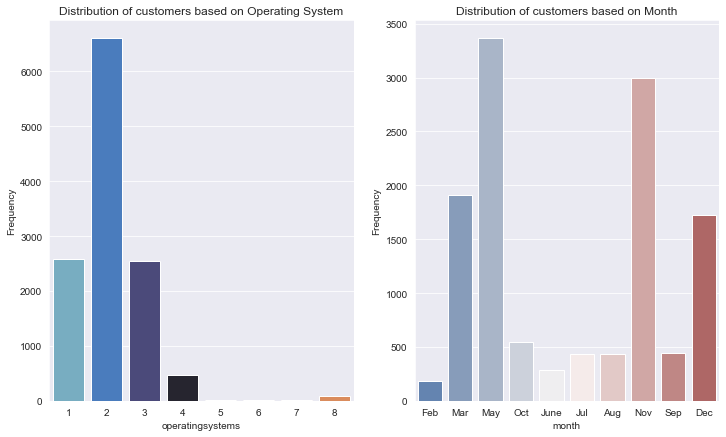

In [22]:
#Distribution of customers with operatings systems and Month
plt.figure(figsize=(12,7))
plt.subplot(1,2,1)
sns.countplot(data.operatingsystems,palette='icefire')
plt.title('Distribution of customers based on Operating System')
plt.ylabel('Frequency')

plt.subplot(1,2,2)
sns.countplot(data.month,palette='vlag')
plt.title('Distribution of customers based on Month')
plt.ylabel('Frequency')

plt.show()

In [23]:
data.operatingsystems.value_counts()

2    6601
1    2585
3    2555
4     478
8      79
6      19
7       7
5       6
Name: operatingsystems, dtype: int64

In [24]:
data.month.value_counts()

May     3364
Nov     2998
Mar     1907
Dec     1727
Oct      549
Sep      448
Aug      433
Jul      432
June     288
Feb      184
Name: month, dtype: int64

In [25]:
size = [6601, 2585, 2555, 478, 111]#79+19+7+6=111 labeled as others
colors = ['lightgreen', 'yellow', 'pink', 'crimson', 'lightblue']
labels = '2','1','3','4','others'

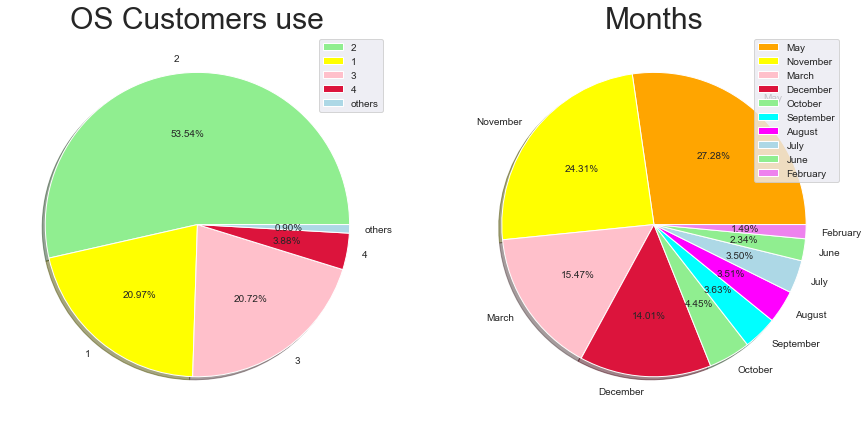

In [26]:
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
plt.pie(size, colors = colors, labels = labels,shadow = True, autopct = '%.2f%%')
plt.title('OS Customers use', fontsize = 30)
plt.axis('off')
plt.legend()

# counts of months
size = [3364, 2998, 1907, 1727, 549, 448, 433, 432, 288, 184]
colors = ['orange', 'yellow', 'pink', 'crimson', 'lightgreen', 'cyan', 'magenta', 'lightblue', 'lightgreen', 'violet']
labels = "May", "November", "March", "December", "October", "September", "August", "July", "June", "February"


plt.subplot(1, 2, 2)
plt.pie(size, colors = colors, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Months', fontsize = 30)
plt.axis('off')
plt.legend()

plt.show()

## Univariate analysis of continuous variables

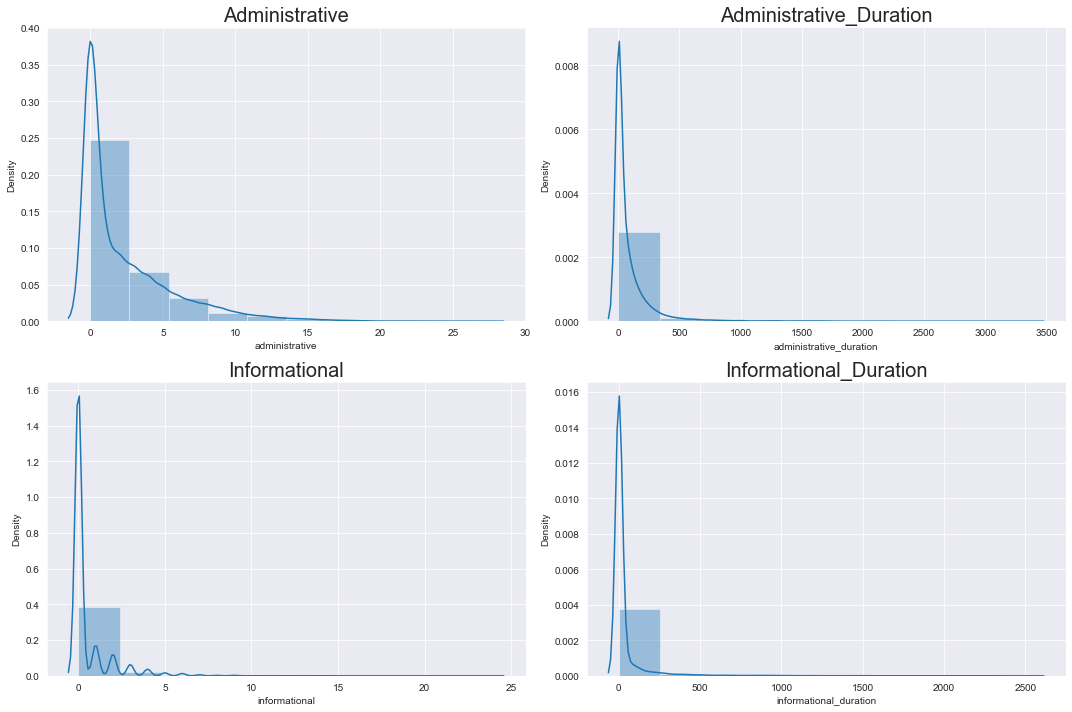

In [27]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(data.administrative,bins=10)
plt.title('Administrative', fontsize = 20)
plt.subplot(2,2,2)
sns.distplot(data.administrative_duration,bins=10)
plt.title('Administrative_Duration', fontsize = 20)
plt.subplot(2,2,3)
sns.distplot(data.informational,bins=10)
plt.title('Informational', fontsize = 20)
plt.subplot(2,2,4)
sns.distplot(data.informational_duration,bins=10)
plt.title('Informational_Duration', fontsize = 20)

plt.tight_layout()
plt.show()

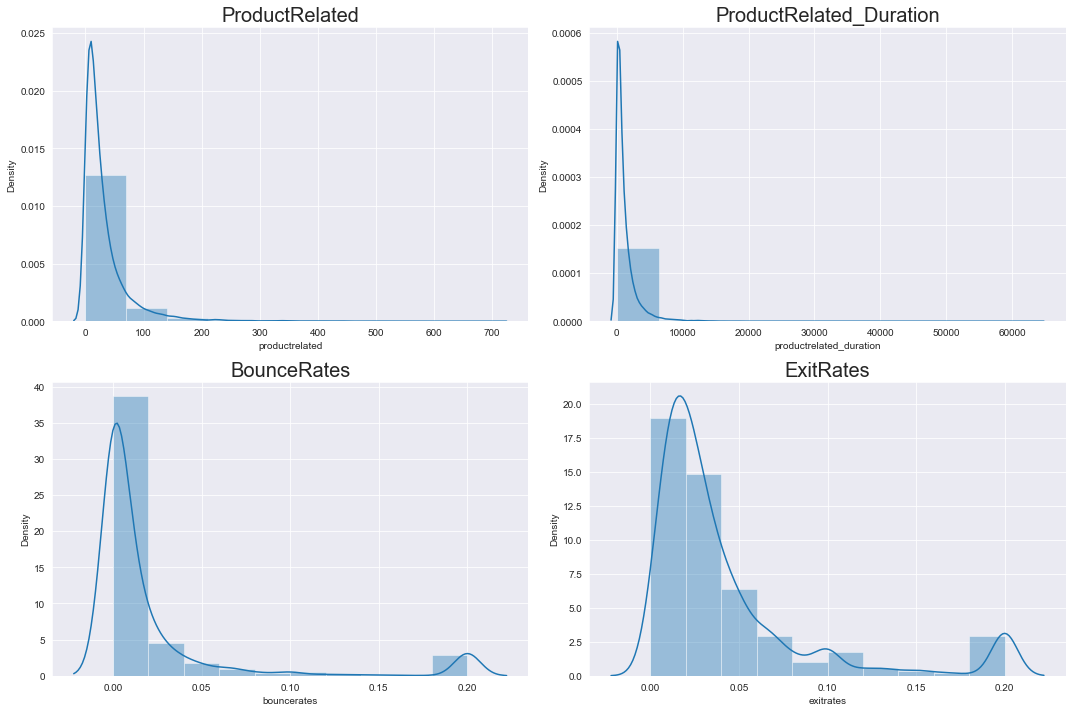

In [28]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.distplot(data.productrelated,bins=10)
plt.title('ProductRelated', fontsize = 20)
plt.subplot(2,2,2)
sns.distplot(data.productrelated_duration,bins=10)
plt.title('ProductRelated_Duration', fontsize = 20)
plt.subplot(2,2,3)
sns.distplot(data.bouncerates,bins=10)
plt.title('BounceRates', fontsize = 20)
plt.subplot(2,2,4)
sns.distplot(data.exitrates,bins=10)
plt.title('ExitRates', fontsize = 20)

plt.tight_layout()
plt.show()

## Bi-variate Analysis of continuous variables against target variable (Revenue)

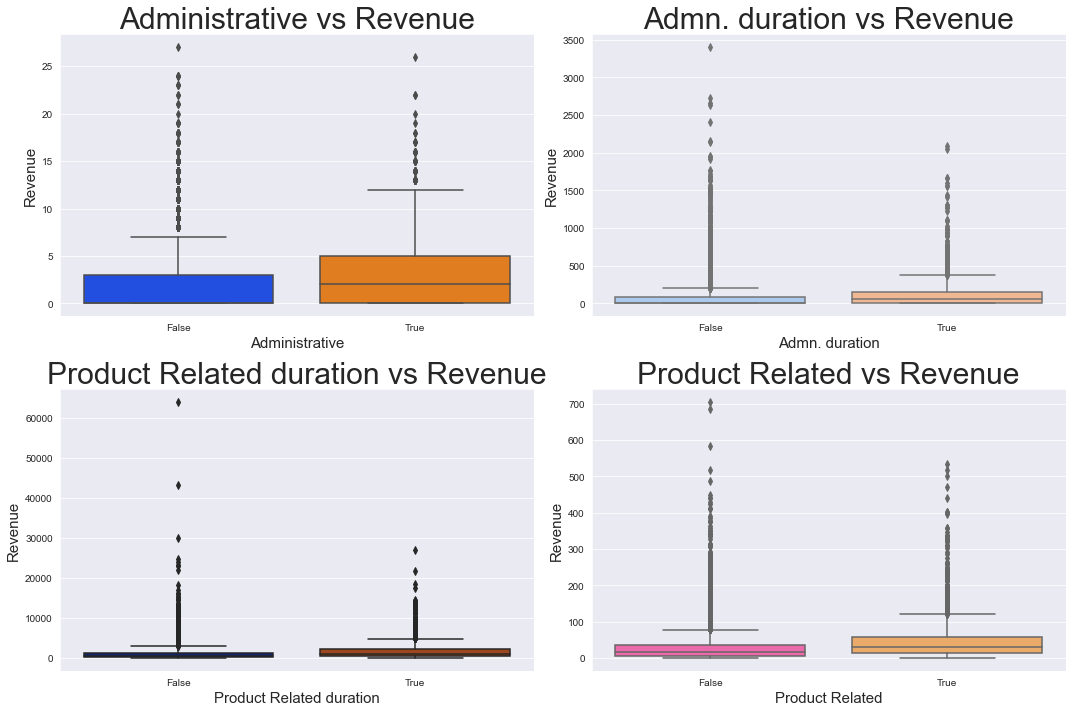

In [29]:
plt.figure(figsize=(15,10))

#administrative vs revenue
plt.subplot(2, 2, 1)
sns.boxplot(data.revenue, data.administrative, palette = 'bright')
plt.title('Administrative vs Revenue', fontsize = 30)
plt.xlabel('Administrative', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# administrative_duration vs revenue

plt.subplot(2, 2, 2)
sns.boxplot(data.revenue, data.administrative_duration, palette = 'pastel')
plt.title('Admn. duration vs Revenue', fontsize = 30)
plt.xlabel('Admn. duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# product related duration vs revenue

plt.subplot(2, 2, 3)
sns.boxplot(data.revenue, data.productrelated_duration, palette = 'dark')
plt.title('Product Related duration vs Revenue', fontsize = 30)
plt.xlabel('Product Related duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# productrelated vs revenue

plt.subplot(2, 2, 4)
sns.boxplot(data.revenue, data.productrelated, palette = 'spring')
plt.title('Product Related vs Revenue', fontsize = 30)
plt.xlabel('Product Related', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.tight_layout()
plt.show()

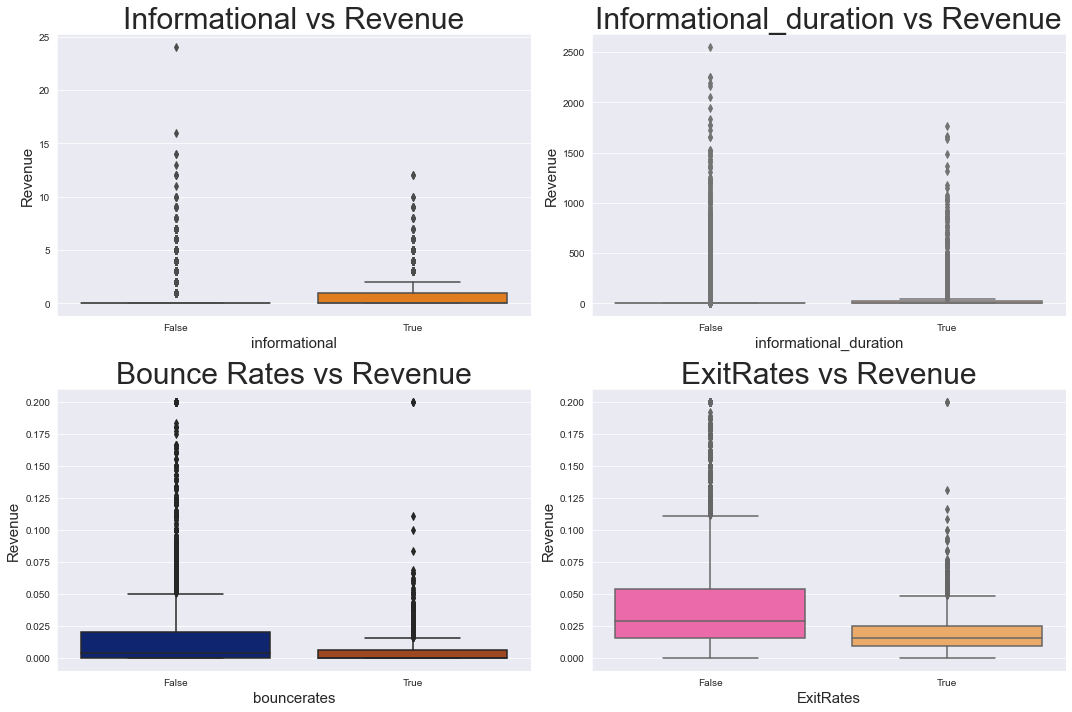

In [30]:
plt.figure(figsize=(15,10))

#informational vs revenue
plt.subplot(2, 2, 1)
sns.boxplot(data.revenue, data.informational, palette = 'bright')
plt.title('Informational vs Revenue', fontsize = 30)
plt.xlabel('informational', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# informational_duration vs revenue

plt.subplot(2, 2, 2)
sns.boxplot(data.revenue, data.informational_duration, palette = 'pastel')
plt.title('Informational_duration vs Revenue', fontsize = 30)
plt.xlabel('informational_duration', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# bouncerates vs revenue

plt.subplot(2, 2, 3)
sns.boxplot(data.revenue, data.bouncerates, palette = 'dark')
plt.title('Bounce Rates vs Revenue', fontsize = 30)
plt.xlabel('bouncerates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

# exit rate vs revenue

plt.subplot(2, 2, 4)
sns.boxplot(data.revenue, data.exitrates, palette = 'spring')
plt.title('ExitRates vs Revenue', fontsize = 30)
plt.xlabel('ExitRates', fontsize = 15)
plt.ylabel('Revenue', fontsize = 15)

plt.tight_layout()
plt.show()

## Bi-variate analysis of categorical variable against Target variable (Revenue)

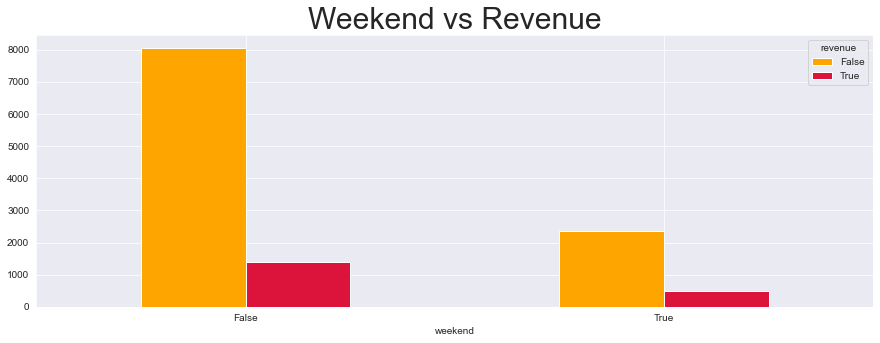

In [31]:
# weekend vs revenue
pd.crosstab(data.weekend,data.revenue).plot(kind = 'bar', figsize = (15, 5), color = ['orange', 'crimson'])
plt.title('Weekend vs Revenue', fontsize = 30)
plt.xticks(rotation=360)
plt.show()

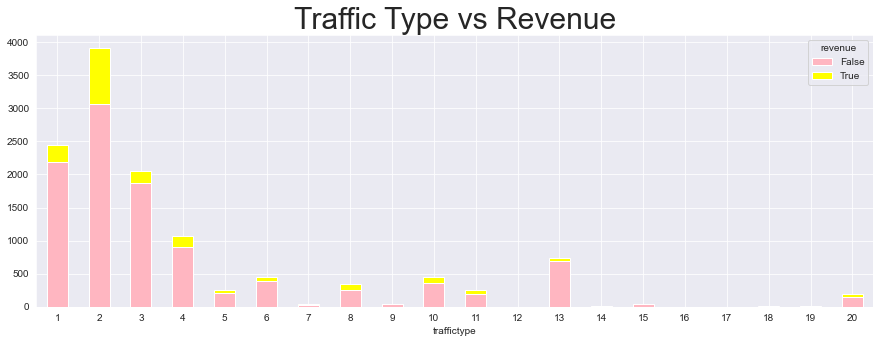

In [32]:
#traffictype vs revenue
pd.crosstab(data.traffictype, data.revenue).plot(kind = 'bar',stacked=True ,figsize = (15, 5), color = ['lightpink', 'yellow'])
plt.title('Traffic Type vs Revenue', fontsize = 30)
plt.xticks(rotation=360)
plt.show()

In [33]:
pd.crosstab(data.revenue,data.traffictype)

traffictype    1     2     3    4    5    6   7    8   9    10   11  12   13  \
revenue                                                                        
False        2189  3066  1872  904  204  391  28  248  38  360  200   1  695   
True          262   847   180  165   56   53  12   95   4   90   47   0   43   

traffictype  14  15  16  17  18  19   20  
revenue                                   
False        11  38   2   1  10  16  148  
True          2   0   1   0   0   1   50

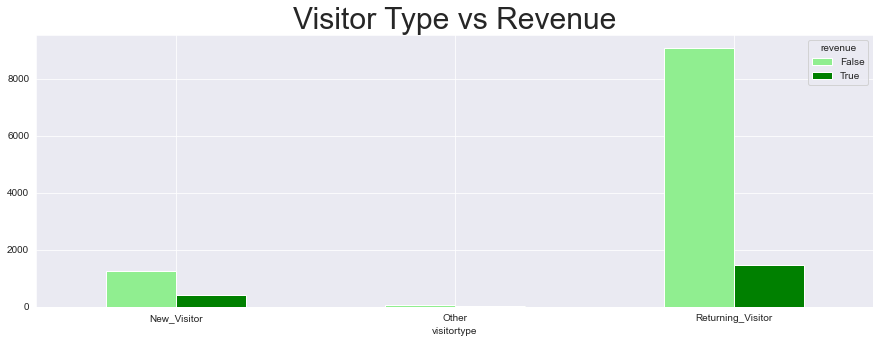

In [34]:
# visitor type vs revenue
pd.crosstab(data.visitortype, data.revenue).plot(kind = 'bar', figsize = (15, 5), color = ['lightgreen', 'green'])
plt.title('Visitor Type vs Revenue', fontsize = 30)
plt.xticks(rotation=360)
plt.show()

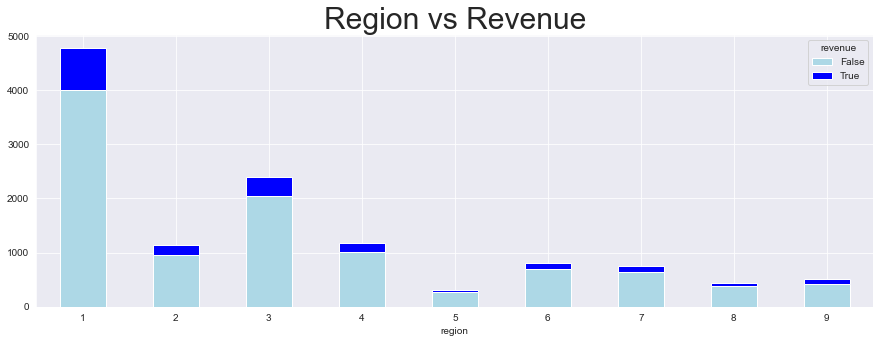

In [35]:
# region vs Revenue
pd.crosstab(data.region, data.revenue).plot(kind = 'bar', stacked=True ,figsize = (15, 5), color = ['lightblue', 'blue'])
plt.title('Region vs Revenue', fontsize = 30)
plt.xticks(rotation=360)
plt.show()

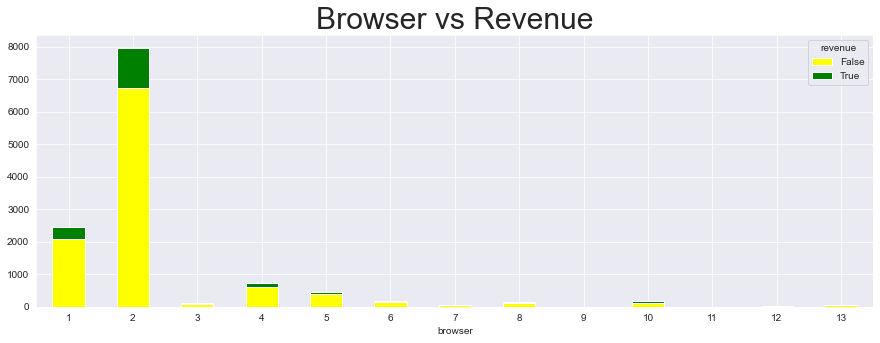

In [36]:
pd.crosstab(data.browser, data.revenue).plot(kind = 'bar',stacked=True, figsize = (15, 5), color = [ 'yellow','green'])
plt.title('Browser vs Revenue', fontsize = 30)
plt.xticks(rotation=360)
plt.show()

In [37]:
pd.crosstab(data.revenue,data.browser)

browser    1     2    3    4    5    6   7    8   9    10  11  12  13
revenue                                                              
False    2097  6738  100  606  381  154  43  114   1  131   5   7  45
True      365  1223    5  130   86   20   6   21   0   32   1   3  16

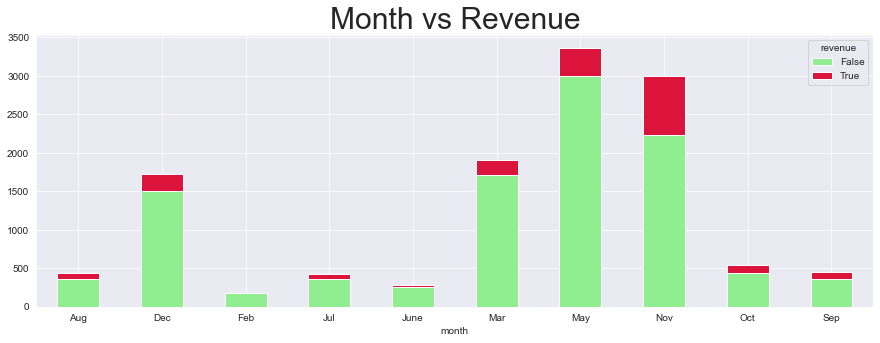

In [38]:
pd.crosstab(data.month, data.revenue).plot(kind = 'bar',stacked=True,figsize = (15, 5), color = [ 'lightgreen','crimson'])
plt.title('Month vs Revenue', fontsize = 30)
plt.xticks(rotation=360)
plt.show()

In [39]:
pd.crosstab(data.revenue, data.month)

month    Aug   Dec  Feb  Jul  June   Mar   May   Nov  Oct  Sep
revenue                                                       
False    357  1511  181  366   259  1715  2999  2238  434  362
True      76   216    3   66    29   192   365   760  115   86

## Bi-variate analysis of independent variables w.r.t Target

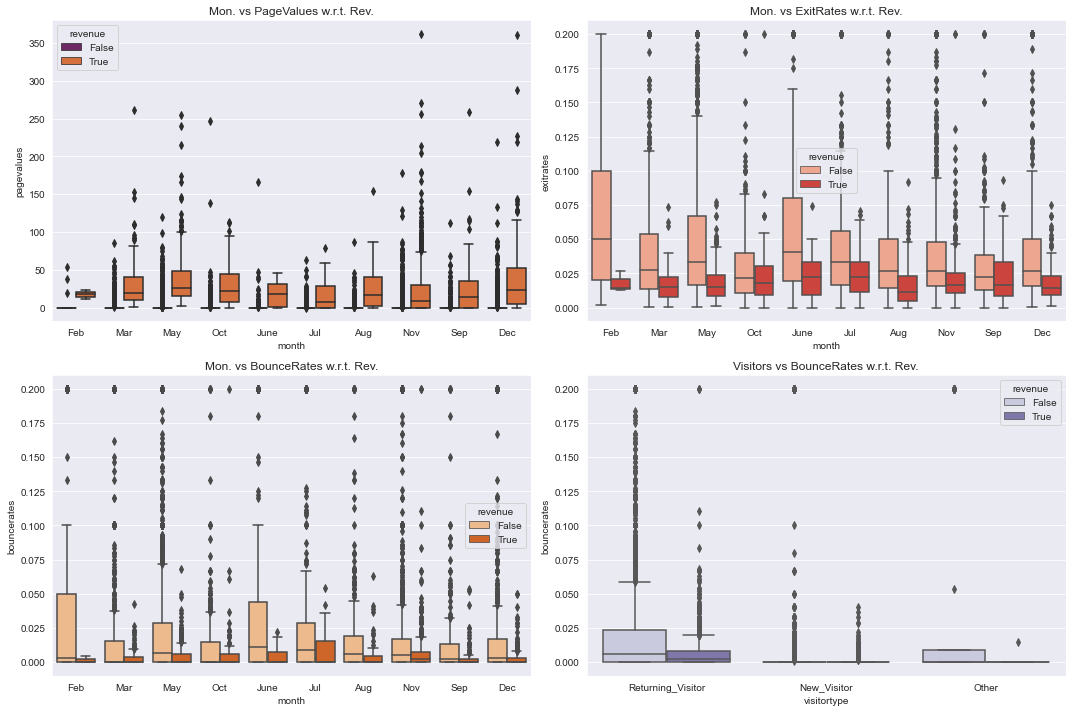

In [40]:
plt.figure(figsize=(15,10))

# month vs pagevalues wrt revenue

plt.subplot(2, 2, 1)
sns.boxplot(x = data.month, y = data.pagevalues, hue = data.revenue, palette = 'inferno')
plt.title('Mon. vs PageValues w.r.t. Rev.')

# month vs exitrates wrt revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data.month, y = data.exitrates, hue = data.revenue, palette = 'Reds')
plt.title('Mon. vs ExitRates w.r.t. Rev.')

# month vs bouncerates wrt revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data.month, y = data.bouncerates, hue = data.revenue, palette = 'Oranges')
plt.title('Mon. vs BounceRates w.r.t. Rev.')

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data.visitortype, y = data.bouncerates, hue = data.revenue, palette = 'Purples')
plt.title('Visitors vs BounceRates w.r.t. Rev.')

plt.tight_layout()
plt.show()

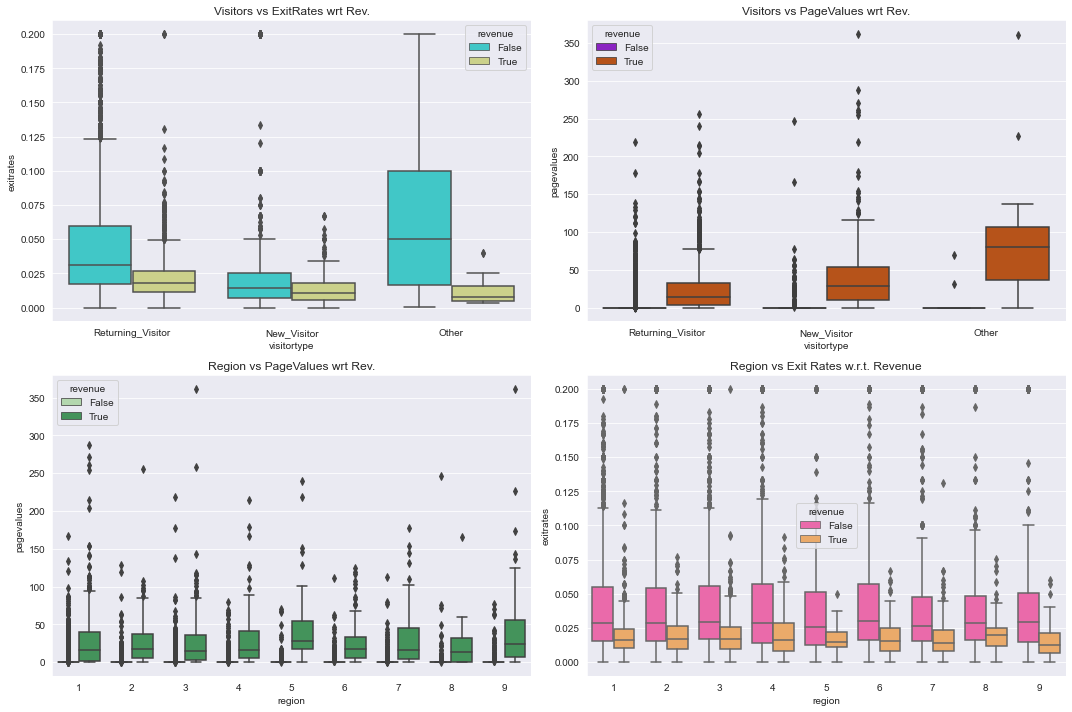

In [41]:
plt.figure(figsize=(15,10))

# visitor type vs exit rates w.r.t revenue
plt.subplot(2, 2, 1)
sns.boxplot(x = data.visitortype, y = data.exitrates, hue = data.revenue, palette = 'rainbow')
plt.title('Visitors vs ExitRates wrt Rev.')

# visitor type vs page values w.r.t revenue
plt.subplot(2, 2, 2)
sns.boxplot(x = data.visitortype, y = data.pagevalues, hue = data.revenue, palette = 'gnuplot')
plt.title('Visitors vs PageValues wrt Rev.')
# region vs pagevalues w.r.t. revenue
plt.subplot(2, 2, 3)
sns.boxplot(x = data.region, y = data.pagevalues, hue = data.revenue, palette = 'Greens')
plt.title('Region vs PageValues wrt Rev.')

#region vs exit rates w.r.t. revenue
plt.subplot(2, 2, 4)
sns.boxplot(x = data.region, y = data.exitrates, hue = data.revenue, palette = 'spring')
plt.title('Region vs Exit Rates w.r.t. Revenue')

plt.tight_layout()
plt.show()

In [42]:
data1=data.copy()

## Statistical tests

In [43]:
#CHI-SQUARE TEST FOR CATEGORICAL VARIBALES
from scipy.stats import chi2_contingency

for i in data.select_dtypes(include=object):
    if i != 'revenue':
        a=pd.crosstab(index=data[i],columns=data['revenue'])
        b=chi2_contingency(a)
        print('p value is:',b[1])
        if b[1]<0.05:
            print(f'{i} is a GOOD predictor')
        else:
            print(f'{i} is a BAD predictor')
        print('\n')

p value is: 2.2387855164805443e-77
month is a GOOD predictor


p value is: 1.4160941129614401e-13
operatingsystems is a GOOD predictor


p value is: 0.00608754317955109
browser is a GOOD predictor


p value is: 0.3214249979076556
region is a BAD predictor


p value is: 1.652735258160153e-67
traffictype is a GOOD predictor


p value is: 4.269904152293867e-30
visitortype is a GOOD predictor


p value is: 0.0012663251061221968
weekend is a GOOD predictor




In [44]:
Yes=data[data.revenue==True]
No=data[data.revenue==False]

In [45]:
#INDEPENDENT T-TEST FOR 2 LEVEL CATERGORICAL VARIBALE AND NUMERICAL VARIABLE

from scipy.stats import ttest_ind
for i in data.select_dtypes(include=np.number):
    a=ttest_ind(Yes[i],No[i])
    print(a)
    if a[1]<0.05:
        print(f'{i} is a good predictor')
    else:
        print(f'{i} is a bad predictor')
    print('\n')    

Ttest_indResult(statistic=15.575193953655198, pvalue=3.5197598377784024e-54)
administrative is a good predictor


Ttest_indResult(statistic=10.436882428979535, pvalue=2.146513634744256e-25)
administrative_duration is a good predictor


Ttest_indResult(statistic=10.618467075902055, pvalue=3.174034311262581e-26)
informational is a good predictor


Ttest_indResult(statistic=7.829853965264804, pvalue=5.282870860721331e-15)
informational_duration is a good predictor


Ttest_indResult(statistic=17.8281897651485, pvalue=3.2411873289224e-70)
productrelated is a good predictor


Ttest_indResult(statistic=17.11804905311505, pvalue=6.115338253467455e-65)
productrelated_duration is a good predictor


Ttest_indResult(statistic=-16.922637906938064, pvalue=1.594197538516729e-63)
bouncerates is a good predictor


Ttest_indResult(statistic=-23.500776627688474, pvalue=1.6626536250736147e-119)
exitrates is a good predictor


Ttest_indResult(statistic=62.84316160063714, pvalue=0.0)
pagevalues is a good pr

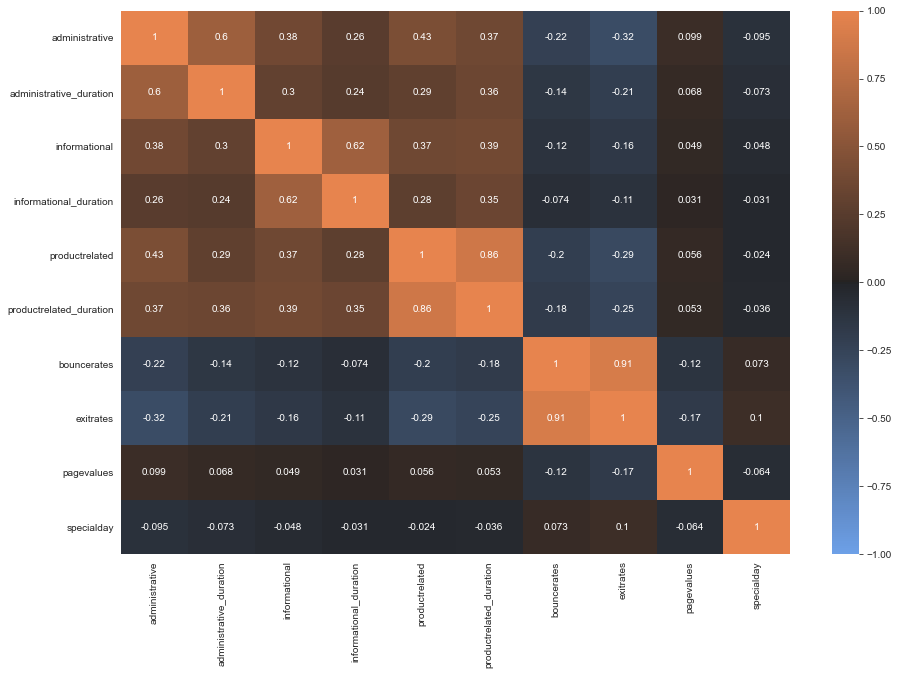

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,vmax=1,vmin=-1,cmap=sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True))
plt.show()

In [47]:
correlated_features = []
correlation_matrix = data.drop(['revenue'], axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)
correlated_features            

['productrelated_duration', 'exitrates']

In [48]:
data1.drop('region',axis=1,inplace=True)

## Dummy encoding

In [49]:
numerical=data1.select_dtypes(include=np.number)
categorical=data1.drop('revenue',axis=1).select_dtypes(include=object)
categorical=pd.get_dummies(categorical,drop_first=True)
target=data1.revenue
data1=pd.concat([numerical,categorical],axis=1)
data1=pd.concat([data1,target],axis=1)
print(data1.shape)
data1.head()

(12330, 61)


administrative  administrative_duration  informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   informational_duration  productrelated  productrelated_duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   bouncerates  exitrates  pagevalues  specialday  month_Dec  month_Feb  \
0         0.20       0.20         0.0         0.0          0          1   
1         0.00       0.10         0.0         0.0          0          1   
2         0.20       0.20         0.0         0.0          0          1   
3         0.05       0.14         0.0         0.0          0          1   
4         0.02       0.05         0.0         0.0          0          1   

   month_Jul  month_June  month_Mar  month_May  month_Nov  month_Oct  \
0          0           0          0          0          0          0   
1          0           0          0          0          0          0   
2          0           0          0          0          0          0   
3          0           0          0          0          0          0   
4          0           0          0          0          0          0   

   month_Sep  operatingsystems_2  operatingsystems_3  operatingsystems_4  \
0          0                   0                   0                   0   
1          0                   1                   0                   0   
2          0                   0                   0                   1   
3          0                   0                   1                   0   
4          0                   0                   1                   0   

   operatingsystems_5  operatingsystems_6  operatingsystems_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   operatingsystems_8  browser_2  browser_3  browser_4  browser_5  browser_6  \
0                   0          0          0          0          0          0   
1                   0          1          0          0          0          0   
2                   0          0          0          0          0          0   
3                   0          1          0          0          0          0   
4                   0          0          1          0          0          0   

   browser_7  browser_8  browser_9  browser_10  browser_11  browser_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           0           0   

   browser_13  traffictype_2  traffictype_3  traffictype_4  traffictype_5  \
0           0              0              0              0              0   
1           0              1              0              0              0   
2           0              0              1              0              0   
3           0              0              0              1              0   
4           0              0              0              1              0   

   traffictype_6  traffictype_7  traffictype_8  traffictype_9  traffictype_10  \
0            

In [50]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data1.revenue=le.fit_transform(data1.revenue)

In [51]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   administrative                 12330 non-null  int64  
 1   administrative_duration        12330 non-null  float64
 2   informational                  12330 non-null  int64  
 3   informational_duration         12330 non-null  float64
 4   productrelated                 12330 non-null  int64  
 5   productrelated_duration        12330 non-null  float64
 6   bouncerates                    12330 non-null  float64
 7   exitrates                      12330 non-null  float64
 8   pagevalues                     12330 non-null  float64
 9   specialday                     12330 non-null  float64
 10  month_Dec                      12330 non-null  uint8  
 11  month_Feb                      12330 non-null  uint8  
 12  month_Jul                      12330 non-null 

## Testing multicolinearity

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

df_numerical=data1.drop('revenue',axis=1)
df_numerical=data1.select_dtypes(include=np.number)
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(df_numerical.values, i) for i in range(df_numerical.shape[1])]
vif["Features"] = df_numerical.columns

vif.sort_values('VIF_Factor', ascending = False).reset_index(drop = True)

VIF_Factor            Features
0          inf  operatingsystems_5
1          inf          browser_11
2    20.100401           browser_2
3    16.759532  operatingsystems_2
4    12.600301           exitrates
..         ...                 ...
56    1.005223  operatingsystems_7
57    1.004385      traffictype_16
58    1.004282           browser_9
59    1.003027      traffictype_17
60    1.002383      traffictype_12

[61 rows x 2 columns]

## Resampling (Similar to smote)

In [53]:
data1.revenue.value_counts()

0    10422
1     1908
Name: revenue, dtype: int64

In [54]:
data1.shape

(12330, 61)

In [55]:
from sklearn.utils import resample
ones=data1[data1.revenue==1]
zeros=data1[data1.revenue==0]
up_ones=resample(ones,replace=True,n_samples=len(zeros),random_state=100)
data2=pd.concat([zeros,up_ones])
print(data2.shape)
data2.head()

(20844, 61)


administrative  administrative_duration  informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   informational_duration  productrelated  productrelated_duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   bouncerates  exitrates  pagevalues  specialday  month_Dec  month_Feb  \
0         0.20       0.20         0.0         0.0          0          1   
1         0.00       0.10         0.0         0.0          0          1   
2         0.20       0.20         0.0         0.0          0          1   
3         0.05       0.14         0.0         0.0          0          1   
4         0.02       0.05         0.0         0.0          0          1   

   month_Jul  month_June  month_Mar  month_May  month_Nov  month_Oct  \
0          0           0          0          0          0          0   
1          0           0          0          0          0          0   
2          0           0          0          0          0          0   
3          0           0          0          0          0          0   
4          0           0          0          0          0          0   

   month_Sep  operatingsystems_2  operatingsystems_3  operatingsystems_4  \
0          0                   0                   0                   0   
1          0                   1                   0                   0   
2          0                   0                   0                   1   
3          0                   0                   1                   0   
4          0                   0                   1                   0   

   operatingsystems_5  operatingsystems_6  operatingsystems_7  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   
3                   0                   0                   0   
4                   0                   0                   0   

   operatingsystems_8  browser_2  browser_3  browser_4  browser_5  browser_6  \
0                   0          0          0          0          0          0   
1                   0          1          0          0          0          0   
2                   0          0          0          0          0          0   
3                   0          1          0          0          0          0   
4                   0          0          1          0          0          0   

   browser_7  browser_8  browser_9  browser_10  browser_11  browser_12  \
0          0          0          0           0           0           0   
1          0          0          0           0           0           0   
2          0          0          0           0           0           0   
3          0          0          0           0           0           0   
4          0          0          0           0           0           0   

   browser_13  traffictype_2  traffictype_3  traffictype_4  traffictype_5  \
0           0              0              0              0              0   
1           0              1              0              0              0   
2           0              0              1              0              0   
3           0              0              0              1              0   
4           0              0              0              1              0   

   traffictype_6  traffictype_7  traffictype_8  traffictype_9  traffictype_10  \
0            

In [56]:
data2.revenue.value_counts()

1    10422
0    10422
Name: revenue, dtype: int64

In [57]:
x=data2.drop('revenue',axis=1)
y=data2.revenue

## Recurrsive Feature Elimination

In [58]:
from sklearn import datasets
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LogisticRegression

In [59]:
from sklearn.model_selection import StratifiedKFold

modelLR=LogisticRegression()
rfecv = RFECV(estimator=modelLR, step=1, cv=StratifiedKFold(5),scoring='roc_auc')
rfecv.fit(x,y)# Doing RFECV to get best number of Features
print("Optimal number of features : %d" % rfecv.n_features_)

Optimal number of features : 58


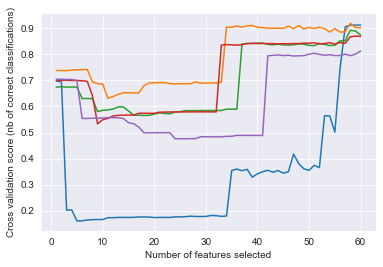

In [60]:
# Plot number of features VS.cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

- From the above plot we can make out that at around 52 Features the accuracy is more or less maxed out hence we will now use RFE to select the best 58 Features

In [61]:
#RFE
logreg = LogisticRegression(max_iter=10000000)

In [62]:
rfe = RFE(logreg, n_features_to_select=58)

In [63]:
rfe = rfe.fit(x, y.values.ravel())

In [64]:
x.columns[rfe.get_support()]

Index(['administrative', 'informational', 'informational_duration',
       'productrelated', 'bouncerates', 'exitrates', 'pagevalues',
       'specialday', 'month_Dec', 'month_Feb', 'month_Jul', 'month_June',
       'month_Mar', 'month_May', 'month_Nov', 'month_Oct', 'month_Sep',
       'operatingsystems_2', 'operatingsystems_3', 'operatingsystems_4',
       'operatingsystems_5', 'operatingsystems_6', 'operatingsystems_7',
       'operatingsystems_8', 'browser_2', 'browser_3', 'browser_4',
       'browser_5', 'browser_6', 'browser_7', 'browser_8', 'browser_9',
       'browser_10', 'browser_11', 'browser_12', 'browser_13', 'traffictype_2',
       'traffictype_3', 'traffictype_4', 'traffictype_5', 'traffictype_6',
       'traffictype_7', 'traffictype_8', 'traffictype_9', 'traffictype_10',
       'traffictype_11', 'traffictype_12', 'traffictype_13', 'traffictype_14',
       'traffictype_15', 'traffictype_16', 'traffictype_17', 'traffictype_18',
       'traffictype_19', 'traffictype_20', '

In [65]:
cols = x.columns[rfe.get_support()]
cols.to_list()

['administrative',
 'informational',
 'informational_duration',
 'productrelated',
 'bouncerates',
 'exitrates',
 'pagevalues',
 'specialday',
 'month_Dec',
 'month_Feb',
 'month_Jul',
 'month_June',
 'month_Mar',
 'month_May',
 'month_Nov',
 'month_Oct',
 'month_Sep',
 'operatingsystems_2',
 'operatingsystems_3',
 'operatingsystems_4',
 'operatingsystems_5',
 'operatingsystems_6',
 'operatingsystems_7',
 'operatingsystems_8',
 'browser_2',
 'browser_3',
 'browser_4',
 'browser_5',
 'browser_6',
 'browser_7',
 'browser_8',
 'browser_9',
 'browser_10',
 'browser_11',
 'browser_12',
 'browser_13',
 'traffictype_2',
 'traffictype_3',
 'traffictype_4',
 'traffictype_5',
 'traffictype_6',
 'traffictype_7',
 'traffictype_8',
 'traffictype_9',
 'traffictype_10',
 'traffictype_11',
 'traffictype_12',
 'traffictype_13',
 'traffictype_14',
 'traffictype_15',
 'traffictype_16',
 'traffictype_17',
 'traffictype_18',
 'traffictype_19',
 'traffictype_20',
 'visitortype_Other',
 'visitortype_Returnin

In [66]:
#Columns selected when we ran rfe with n_features as 15
cols_first=['bouncerates',
 'exitrates',
 'month_Dec',
 'month_Feb',
 'month_Mar',
 'month_Nov',
 'browser_3',
 'browser_12',
 'traffictype_3',
 'traffictype_8',
 'traffictype_13',
 'traffictype_15',
 'traffictype_16',
 'traffictype_18',
 'traffictype_20']

## PCA

##### As One Hot Encoding introduces some multicollinearity we will use PCA to eliminate it

In [67]:
#Finding the highly correlated features in the data after dummy encoding
correlated_features = []
correlation_matrix = data2.drop(['revenue'], axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)
correlated_features  

['productrelated_duration',
 'exitrates',
 'browser_11',
 'browser_13',
 'visitortype_Other']

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
sc=StandardScaler()

In [70]:
x=data2[cols.to_list()].values

In [71]:
x=sc.fit_transform(x)
data3=PCA(n_components=58)
data3.fit(x)

PCA(n_components=58)

In [72]:
#The amount of variance that each PC explains
var=data3.explained_variance_ratio_
var

array([5.46320515e-02, 5.07101946e-02, 3.67841144e-02, 3.49237990e-02,
       3.24436553e-02, 2.88523043e-02, 2.76814822e-02, 2.46692765e-02,
       2.24294812e-02, 2.21627494e-02, 2.16982522e-02, 2.10950416e-02,
       2.00374003e-02, 1.99658434e-02, 1.94949000e-02, 1.90734241e-02,
       1.87770359e-02, 1.85777542e-02, 1.81754008e-02, 1.80137046e-02,
       1.79881308e-02, 1.77036225e-02, 1.76203774e-02, 1.73624606e-02,
       1.72932186e-02, 1.72809603e-02, 1.72485357e-02, 1.72115820e-02,
       1.71441887e-02, 1.70532985e-02, 1.69937829e-02, 1.68778106e-02,
       1.67519385e-02, 1.65846013e-02, 1.64180119e-02, 1.61625245e-02,
       1.59790004e-02, 1.58357495e-02, 1.55474064e-02, 1.49774153e-02,
       1.47509739e-02, 1.42098044e-02, 1.32141554e-02, 1.29080092e-02,
       1.20071626e-02, 1.15003290e-02, 1.00162969e-02, 9.26922295e-03,
       8.46834319e-03, 8.02126423e-03, 6.20702532e-03, 4.04955410e-03,
       3.29602862e-03, 2.85655909e-03, 1.42444229e-03, 8.27313511e-04,
      

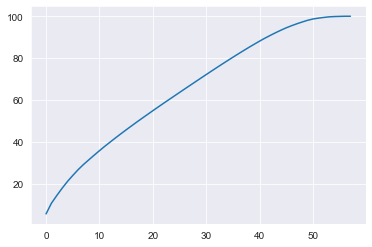

In [73]:
#Cumulative Variance explains
var1=np.cumsum(np.round(data3.explained_variance_ratio_, decimals=4)*100)
var1
plt.plot(var1)
plt.show()

In [74]:
var1

array([  5.46,  10.53,  14.21,  17.7 ,  20.94,  23.83,  26.6 ,  29.07,
        31.31,  33.53,  35.7 ,  37.81,  39.81,  41.81,  43.76,  45.67,
        47.55,  49.41,  51.23,  53.03,  54.83,  56.6 ,  58.36,  60.1 ,
        61.83,  63.56,  65.28,  67.  ,  68.71,  70.42,  72.12,  73.81,
        75.49,  77.15,  78.79,  80.41,  82.01,  83.59,  85.14,  86.64,
        88.12,  89.54,  90.86,  92.15,  93.35,  94.5 ,  95.5 ,  96.43,
        97.28,  98.08,  98.7 ,  99.1 ,  99.43,  99.72,  99.86,  99.94,
       100.01, 100.01])

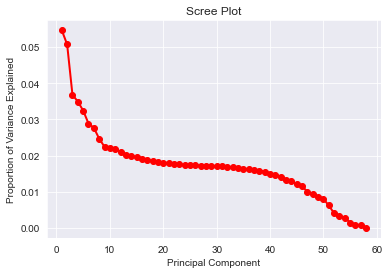

In [75]:
PC_values = np.arange(data3.n_components_) + 1
plt.plot(PC_values, data3.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [76]:
#Looking at above plot I'm taking 47 variables
pca = PCA(n_components=47)
pca.fit(x)
x1=pca.fit_transform(x)
print(x1)

[[ 0.45399346 -5.52314579  1.62258814 ... -0.69748423 -0.81169547
  -0.32533634]
 [-0.22802146 -1.62999846 -0.38760963 ... -1.11344931 -0.47921384
  -0.45083012]
 [ 0.4338912  -5.99770358  1.5522417  ... -0.40671335 -1.22994345
  -1.0630429 ]
 ...
 [ 0.24564079  0.1090268  -2.15398744 ...  0.00605589  0.86491079
   0.13984399]
 [-0.458443   -1.06190098 -0.7653878  ... -1.10801998 -0.4875994
  -0.11814497]
 [-0.85901164  2.17932522  1.01759997 ... -0.45382351  0.0961879
  -0.22927092]]


In [77]:
x1=pd.DataFrame(x1)
x1.shape

(20844, 47)

# Model

### Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score,train_test_split
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score

In [79]:
y=data2.revenue

In [80]:
xtrain,xtest,ytrain,ytest=train_test_split(x1,y,train_size=0.7,random_state=100)

In [81]:
modelLR=LogisticRegression()

In [82]:
model1=modelLR.fit(x1,y)

In [83]:
ypred_logreg=model1.predict(xtest)
print(classification_report(ytest,ypred_logreg))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82      3181
           1       0.84      0.76      0.80      3073

    accuracy                           0.81      6254
   macro avg       0.81      0.81      0.81      6254
weighted avg       0.81      0.81      0.81      6254



In [84]:
pd.crosstab(ytest,ypred_logreg,margins=True,rownames=['Actual'],colnames=['Predicted'])

Predicted     0     1   All
Actual                     
0          2728   453  3181
1           723  2350  3073
All        3451  2803  6254

In [85]:
#finding fpr, tpr & thresholds
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds =roc_curve(ytest, ypred_logreg)

In [86]:
#AUC -Area Under Curve
td_roc_auc = auc(fpr,tpr)
print(td_roc_auc)

0.8111584883112011


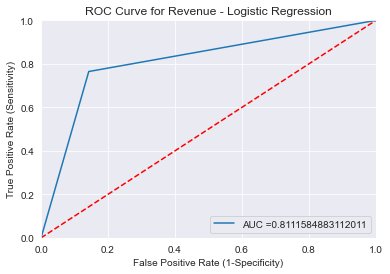

In [87]:
#ROC Curve
plt.title('ROC Curve for Revenue - Logistic Regression')
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(td_roc_auc))
plt.legend(loc=4)
plt.show()

## AdaBoost

In [88]:
from sklearn.ensemble import AdaBoostClassifier
adc=AdaBoostClassifier()
model2=adc.fit(xtrain,ytrain)
ypred_adc=model2.predict(xtest)
print(classification_report(ytest,ypred_adc))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      3181
           1       0.79      0.76      0.77      3073

    accuracy                           0.78      6254
   macro avg       0.78      0.78      0.78      6254
weighted avg       0.78      0.78      0.78      6254



In [89]:
#finding fpr, tpr & thresholds
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds =roc_curve(ytest, ypred_adc)

In [90]:
#AUC -Area Under Curve
td_roc_auc = auc(fpr,tpr)
print(td_roc_auc)

0.7812494725178879


## Naive Bayes

In [91]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
model_NB = NB.fit(xtrain,ytrain)
y_pred_nb=model_NB.predict(xtest)
print(classification_report(ytest, y_pred_nb))

              precision    recall  f1-score   support

           0       0.78      0.23      0.35      3181
           1       0.54      0.93      0.68      3073

    accuracy                           0.57      6254
   macro avg       0.66      0.58      0.52      6254
weighted avg       0.66      0.57      0.52      6254



## KNN

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=4)
model_knn=knn.fit(xtrain,ytrain)
ypred_knn=model_knn.predict(xtest)
print(classification_report(ytest,ypred_knn))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86      3181
           1       0.83      0.90      0.86      3073

    accuracy                           0.86      6254
   macro avg       0.86      0.86      0.86      6254
weighted avg       0.86      0.86      0.86      6254



In [93]:
#finding fpr, tpr & thresholds
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds =roc_curve(ytest, ypred_knn)

#AUC -Area Under Curve
td_roc_auc = auc(fpr,tpr)
print(td_roc_auc)

0.8626328142414902


## SVM

In [94]:
#SVC - Suppot Vector Classifier
from sklearn.svm import SVC
svc =SVC() 
modelSVM = svc.fit(xtrain, ytrain)
y_pred_svm= modelSVM.predict(xtest)
print(classification_report(ytest,y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      3181
           1       0.85      0.83      0.84      3073

    accuracy                           0.84      6254
   macro avg       0.84      0.84      0.84      6254
weighted avg       0.84      0.84      0.84      6254



In [95]:
modelSVM.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [96]:
#SVM WITH GRID SEARCH

from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100],'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(xtrain, ytrain)
svm_grid_predictions = grid.predict(xtest)
print(classification_report(ytest, svm_grid_predictions))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=  37.8s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.737 total time=  37.9s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.731 total time=  21.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.693 total time=  20.6s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.721 total time=  20.7s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.794 total time=  18.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=  17.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=  19.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.802 total time=  21.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.802 total time=  21.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.787 total time=  17.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

In [97]:
print(classification_report(ytest, svm_grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.93      0.95      3181
           1       0.93      0.98      0.95      3073

    accuracy                           0.95      6254
   macro avg       0.95      0.95      0.95      6254
weighted avg       0.95      0.95      0.95      6254



In [98]:
#finding fpr, tpr & thresholds
from sklearn.metrics import roc_curve, auc, roc_auc_score
fpr, tpr, thresholds =roc_curve(ytest, svm_grid_predictions)

#AUC -Area Under Curve
td_roc_auc = auc(fpr,tpr)
print(td_roc_auc)

0.9535917529367391


## Decision Tree

In [99]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
DT=DecisionTreeClassifier()
model=DT.fit(xtrain,ytrain)
y_pred_dt=model.predict(xtest)
print(classification_report(ytest, y_pred_dt))

              precision    recall  f1-score   support

           0       0.99      0.87      0.93      3181
           1       0.88      0.99      0.93      3073

    accuracy                           0.93      6254
   macro avg       0.94      0.93      0.93      6254
weighted avg       0.94      0.93      0.93      6254



## Random Forest

In [101]:
from sklearn.ensemble import RandomForestClassifier

In [102]:
RF = RandomForestClassifier(n_estimators=300,bootstrap=True,max_features='sqrt')
model_rf=RF.fit(xtrain,ytrain)
y_pred_rf=model_rf.predict(xtest)
print(classification_report(ytest, y_pred_rf))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      3181
           1       0.93      0.99      0.96      3073

    accuracy                           0.96      6254
   macro avg       0.96      0.96      0.96      6254
weighted avg       0.96      0.96      0.96      6254



In [103]:
fi = pd.DataFrame({'feature': list(xtrain.columns),
                   'importance': model_rf.feature_importances_}).\
                    sort_values('importance', ascending=False)
fi

feature  importance
1         1    0.108646
39       39    0.049729
40       40    0.036552
20       20    0.029573
2         2    0.028733
34       34    0.026202
26       26    0.025102
0         0    0.023432
45       45    0.023407
7         7    0.023303
42       42    0.023085
5         5    0.023056
23       23    0.020051
41       41    0.019983
4         4    0.019905
46       46    0.019734
32       32    0.019568
37       37    0.019179
27       27    0.018863
43       43    0.018386
44       44    0.018303
12       12    0.017778
35       35    0.017358
38       38    0.017228
3         3    0.016962
24       24    0.016860
6         6    0.016769
25       25    0.016659
9         9    0.016600
10       10    0.016172
18       18    0.015829
33       33    0.015821
17       17    0.015650
8         8    0.015454
31       31    0.015391
14       14    0.015266
15       15    0.015023
36       36    0.015021
13       13    0.014985
30       30    0.014969
21       21    0.014709
16       16    0.014688
19       19    0.014352
11       11    0.014325
28       28    0.013959
29       29    0.013692
22       22    0.013689

In [104]:
# RANDOM SEARCH

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model_random_search_rf = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model_random_search_rf.fit(xtrain,ytrain)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

In [105]:
model_random_search_rf.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=2, min_samples_leaf=8,
                       min_samples_split=7, n_estimators=20)

In [106]:
predictionforest_random_search = model_random_search_rf.best_estimator_.predict(xtest)
print(classification_report(ytest,predictionforest_random_search))

              precision    recall  f1-score   support

           0       0.74      0.67      0.70      3181
           1       0.69      0.76      0.72      3073

    accuracy                           0.71      6254
   macro avg       0.72      0.71      0.71      6254
weighted avg       0.72      0.71      0.71      6254



- There is a chance that these models are overfitting so we try building models using less number of variables

In [107]:
x=data2[cols_first]
y=data2.revenue

In [108]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.7,random_state=100)

## Logistic Regression

In [109]:
LR=LogisticRegression()
model2_lr=LR.fit(xtrain,ytrain)
y_pred_log=model2_lr.predict(xtest)
print(classification_report(ytest,y_pred_log))

              precision    recall  f1-score   support

           0       0.71      0.60      0.65      3181
           1       0.64      0.74      0.69      3073

    accuracy                           0.67      6254
   macro avg       0.67      0.67      0.67      6254
weighted avg       0.67      0.67      0.67      6254



## Tabulation

In [111]:
from sklearn.metrics import accuracy_score
result=pd.DataFrame({'Models':['Logistic Regression','AdaBoost Classifier','Naive Bayes',
                                                         'K-Nearest Neighbors Classifier ','Support Vector Classifier','SVM with Grid Search','Decision Tree','Random Forest','Random Forest with Random Search','Logistic Regression without PCA'],
                            'Accuracy Scores of Models':[accuracy_score(ytest,ypred_logreg),accuracy_score(ytest,ypred_adc),accuracy_score(ytest,y_pred_nb),accuracy_score(ytest,ypred_knn),accuracy_score(ytest,y_pred_svm),accuracy_score(ytest, svm_grid_predictions),
                                                        accuracy_score(ytest, y_pred_dt),accuracy_score(ytest, y_pred_rf),accuracy_score(ytest,predictionforest_random_search),accuracy_score(ytest,y_pred_log)]})
result

Models  Accuracy Scores of Models
0               Logistic Regression                   0.811960
1               AdaBoost Classifier                   0.781580
2                       Naive Bayes                   0.574512
3   K-Nearest Neighbors Classifier                    0.862008
4         Support Vector Classifier                   0.842341
5              SVM with Grid Search                   0.953150
6                     Decision Tree                   0.930445
7                     Random Forest                   0.959546
8  Random Forest with Random Search                   0.713303
9   Logistic Regression without PCA                   0.668692

- The best model based on accuracy is Random Forest. But there is a chance that it is overfitting as trees are greedy approach and might not work well on test data. So the best model would be SVM with grid Search. We can adjust the parameters and test it. ALSO IT WORKS WELL ON TEST DATA for a low value of C. 